In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam

In [2]:
(x_train, t_train), (x_test, t_test) = cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step


In [3]:
# (데이터 수, 행, 열, 색상 종류)
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)
print(x_train.shape, x_test.shape)
print(t_train.shape, t_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [4]:
# 정규화
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

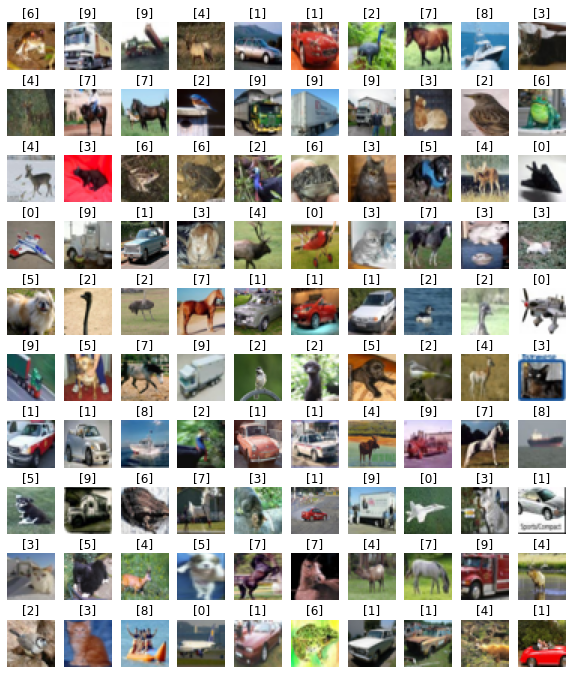

In [5]:
plt.figure(figsize=(10, 12))
for index in range(100):
    plt.subplot(10, 10, index+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')
    plt.title(str(t_train[index]))
plt.show()

In [6]:
cnn = Sequential()
cnn.add(Conv2D(input_shape=(32, 32, 3), kernel_size=(3, 3),
               padding='same', filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3, 3), padding='same', filters=32, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))

cnn.add(Conv2D(kernel_size=(3, 3), padding='same', filters=64, activation='relu'))
cnn.add(Conv2D(kernel_size=(3, 3), padding='same', filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))

cnn.add(Conv2D(kernel_size=(3, 3), padding='same', filters=128, activation='relu'))
cnn.add(Conv2D(kernel_size=(3, 3), padding='same', filters=128, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))

cnn.add(Conv2D(kernel_size=(3, 3), padding='same', filters=256, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [7]:
cnn.compile(loss='sparse_categorical_crossentropy', 
            optimizer=Adam(), metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

In [9]:
hist = cnn.fit(x_train, t_train, batch_size=128,
               epochs=3, validation_data=(x_test, t_test))

Epoch 1/3
391/391 [==============================] - 59s 151ms/step - loss: 1.1056 - accuracy: 0.6096 - val_loss: 0.9835 - val_accuracy: 0.6594
Epoch 2/3
391/391 [==============================] - 60s 153ms/step - loss: 1.0498 - accuracy: 0.6315 - val_loss: 0.9505 - val_accuracy: 0.6690
Epoch 3/3
391/391 [==============================] - 60s 154ms/step - loss: 1.0020 - accuracy: 0.6439 - val_loss: 0.9118 - val_accuracy: 0.6811


In [ ]:
cnn.evaluate(x_test, t_test)

In [ ]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.show()

In [ ]:
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')
plt.show()